### **"dl4td_ModelEvaluation"**

#### **Libraries Used:**
- pandas
- matplotlib.pyplot
- scikit-learn

#### **Data Preparation:**
- Loaded dataset.
- Imported custom module "data_cleaning" for data cleaning.
- Cleaned data using function "clean_data" from "data_cleaning" module.
- Defined features and labels.
- Split data into train and test sets (test_size=0.2, random_state=42).
- Standardized features using StandardScaler.

#### **Model Building:**
- Defined a dictionary of models with corresponding pipelines.
- Included models such as Logistic Regression, Decision Tree, Random Forest, SVM, K-NN, and Naive Bayes.

#### **Model Evaluation:**
- Defined a dictionary of evaluation metrics including Accuracy, Precision, Recall, F1 Score, and ROC AUC.
- Trained and evaluated each model using the training and test data.
- Calculated evaluation metrics for each model and stored the results in a DataFrame.
- Plotted the results to compare models based on evaluation metrics.
- Identified the best model based on the highest accuracy score.

#### **Results Summary:**
- The best performing model was determined to be {best_model} with an accuracy of {best_accuracy}.


----------

## Load libraries

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('../data/drinking_water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


## Data Preparation

In [5]:
import sys
sys.path.append("../modules")  # Add parent directory to path if necessary

# Now you can import the module or function
import data_cleaning

# Then you can call the desired function
df_cleang = data_cleaning.clean_data(df)


In [6]:
# Check for missing values
df_cleang.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Define features and labels

In [7]:
# Define features and labels
features = df.columns[:-1]
labels = df.columns[-1]

In [8]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[labels], test_size=0.2, random_state=42)

In [9]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define a dictionary of models with their corresponding pipelines
# Each model is paired with a pipeline that includes StandardScaler() for scaling features if required
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': make_pipeline(StandardScaler(), SVC()),
    'K-NN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Naive Bayes': GaussianNB()
}


In [11]:
# Define a dictionary of evaluation metrics to be used for model evaluation
evaluation_metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}


In [13]:
results = {}

# Iterate over each model and train/evaluate it
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics for each model
    results[name] = {metric_name: metric_function(y_test, y_pred) for metric_name, metric_function in evaluation_metrics.items()}


c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)


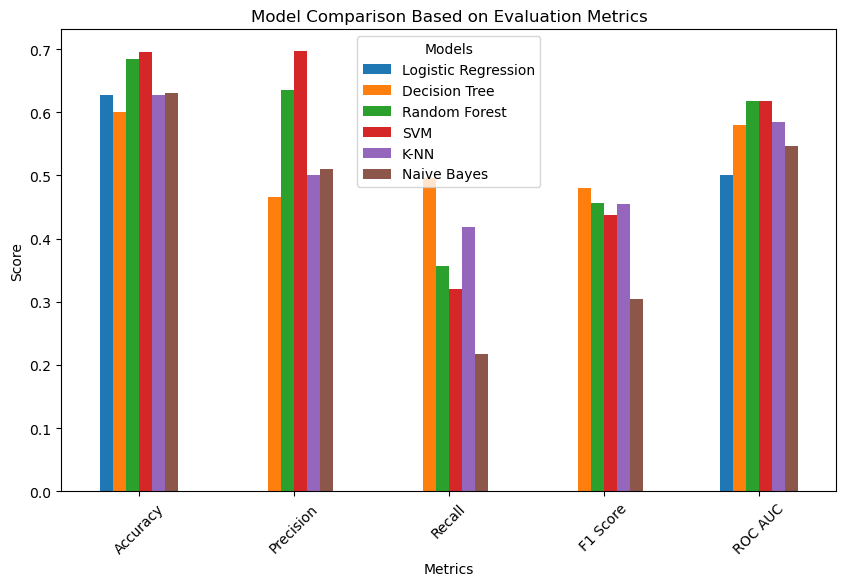

In [15]:
# Plot results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison Based on Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.show()


In [16]:
print(results_df)

           Logistic Regression  Decision Tree  Random Forest       SVM  \
Accuracy              0.628049       0.600610       0.684451  0.695122   
Precision             0.000000       0.465385       0.635036  0.696429   
Recall                0.000000       0.495902       0.356557  0.319672   
F1 Score              0.000000       0.480159       0.456693  0.438202   
ROC AUC               0.500000       0.579261       0.617599  0.618574   

               K-NN  Naive Bayes  
Accuracy   0.628049     0.631098  
Precision  0.500000     0.509615  
Recall     0.418033     0.217213  
F1 Score   0.455357     0.304598  
ROC AUC    0.585230     0.546713  


In [19]:
# Define a dictionary of evaluation metrics to be used for model evaluation
# Each metric is paired with its corresponding function for calculation
evaluation_metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}


In [20]:
results = {}

# Iterate over each model and train/evaluate it
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate accuracy score for each model
    results[name] = accuracy_score(y_test, y_pred)


In [21]:
# Find the best model based on the highest accuracy score
best_model = max(results, key=results.get)

# Retrieve the accuracy score of the best model
best_accuracy = results[best_model]


In [22]:
print(f"Best Model: {best_model}")
print(f"Accuracy: {best_accuracy}")

Best Model: SVM
Accuracy: 0.6951219512195121
